In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
Emotions = pd.read_csv('/Emotions_new.csv')
Emotions

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.400879,0.591309,0.783203,0.777832,0.771973,0.777832,0.771973,0.775391,0.758789,0.580078,...,2.585884,2.746578,2.223155,0.986784,-0.730886,-2.531058,-4.002848,-4.849192,-4.929412,Calmness
1,0.237305,0.357422,0.490234,0.489258,0.496582,0.496582,0.496094,0.504395,0.510254,0.520996,...,4.930090,1.792602,-3.300726,-1.595419,-0.393219,4.554768,0.592237,-4.334474,-0.473554,Calmness
2,0.299316,0.423340,0.551270,0.497559,0.466309,0.437500,0.406250,0.389648,0.387207,0.398926,...,5.634124,5.755517,4.933850,3.188369,0.717604,-2.072404,-4.603561,-6.258968,-6.588849,Calmness
3,0.254883,0.386719,0.506836,0.510254,0.502441,0.498535,0.505859,0.491211,0.503906,0.497070,...,-0.459867,0.028381,1.607926,0.201128,3.941260,0.717465,1.941158,0.988947,-0.745452,Calmness
4,0.340820,0.465820,0.621094,0.660156,0.688965,0.703613,0.707520,0.626465,0.559570,0.589355,...,2.532346,2.228586,1.981835,1.749758,1.501951,1.218427,0.887426,0.504350,0.073224,Calmness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30651,0.025879,0.043457,0.062988,0.062500,0.058594,0.053711,0.069336,0.104492,0.129395,0.135254,...,4.505565,4.996422,2.017134,2.868165,3.755028,3.287005,1.767041,-0.545711,-1.063578,Anger
30652,0.023926,0.035156,0.040527,0.035645,0.032715,0.029297,0.032715,0.048340,0.125488,0.214844,...,-5.741303,-4.147367,-7.531296,-3.492056,-2.512284,-11.724421,-7.290385,1.041335,1.246792,Happiness
30653,0.023926,0.035156,0.041504,0.036621,0.033691,0.030273,0.032715,0.048340,0.125488,0.213867,...,-6.582853,-4.559318,-6.885002,-2.437966,-3.580120,-11.156595,-7.412944,0.877735,0.481874,Happiness
30654,0.022461,0.034668,0.041992,0.038086,0.038086,0.034668,0.036133,0.044434,0.117676,0.207031,...,-4.208821,3.741515,-2.212302,1.554489,-3.257357,-17.360344,-1.698289,6.971028,-4.712042,Happiness


In [4]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [5]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(30656, 2377)

In [6]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

Data preparation

In [7]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [8]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
print(Y.shape)
X.shape

(30656, 4)


(30656, 2376)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24524, 2376), (24524, 4), (6132, 2376), (6132, 4))

In [11]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [12]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24524, 2376), (24524, 4), (6132, 2376), (6132, 4))

In [13]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

Applying early stopping for all models

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [15]:
early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

CNN model

In [16]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((24524, 2376, 1), (24524, 4), (6132, 2376, 1), (6132, 4))

In [17]:
import tensorflow as tf

In [18]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(4,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [19]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
384/384 [==============================] - 147s 345ms/step - loss: 0.9617 - accuracy: 0.5986 - val_loss: 1.1583 - val_accuracy: 0.4855 - lr: 0.0010
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


384/384 [==============================] - 131s 341ms/step - loss: 0.7671 - accuracy: 0.6782 - val_loss: 0.7225 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 3/50
384/384 [==============================] - 131s 341ms/step - loss: 0.6882 - accuracy: 0.7128 - val_loss: 0.7509 - val_accuracy: 0.6959 - lr: 0.0010
Epoch 4/50
384/384 [==============================] - 131s 341ms/step - loss: 0.6195 - accuracy: 0.7445 - val_loss: 0.6735 - val_accuracy: 0.7247 - lr: 0.0010
Epoch 5/50
384/384 [==============================] - 131s 340ms/step - loss: 0.5552 - accuracy: 0.7755 - val_loss: 0.5707 - val_accuracy: 0.7611 - lr: 0.0010
Epoch 6/50
384/384 [==============================] - 128s 334ms/step - loss: 0.4880 - accuracy: 0.8037 - val_loss: 0.5199 - val_accuracy: 0.7963 - lr: 0.0010
Epoch 7/50
384/384 [==============================] - 130s 339ms/step - loss: 0.3978 - accuracy: 0.8439 - val_loss: 0.5648 - val_accuracy: 0.7648 - lr: 0.0010
Epoch 8/50
384/384 [==============================] - 128

192/192 [==============================] - 11s 52ms/step - loss: 0.0462 - accuracy: 0.9887
Accuracy of our model on test data :  98.87475371360779 %


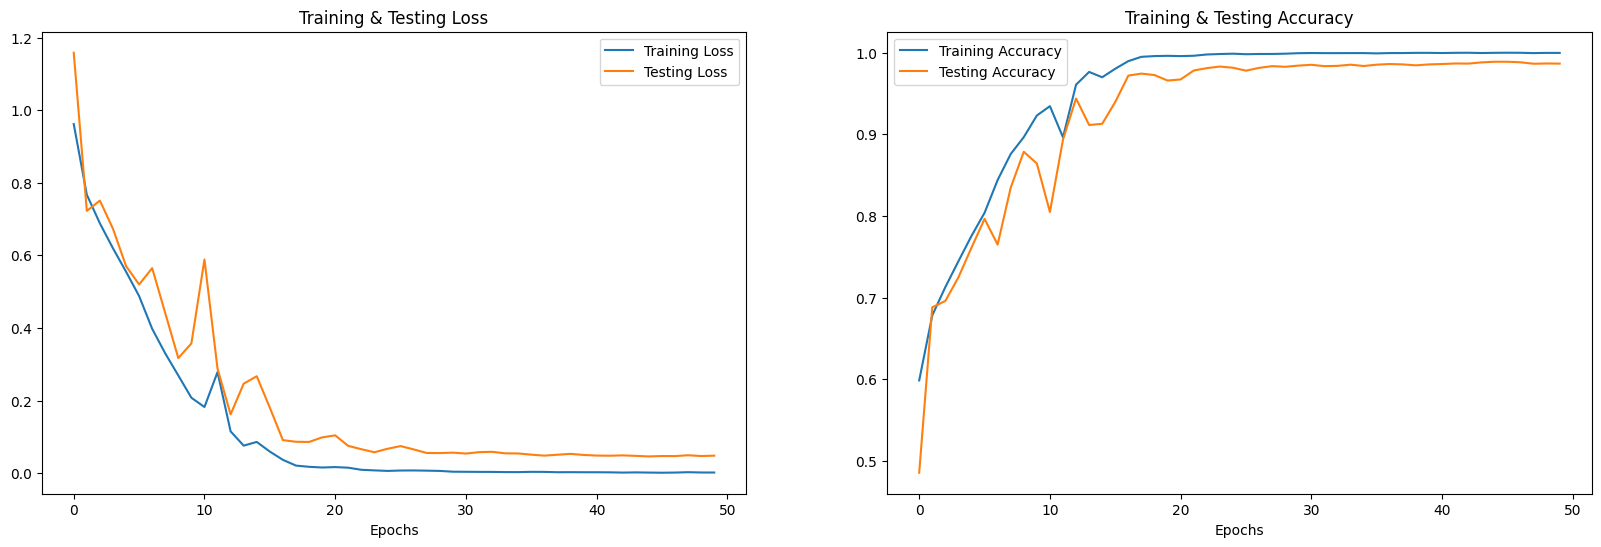

In [21]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [22]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

192/192 [==============================] - 9s 46ms/step


,Predicted Labels,Actual Labels
0,Happiness,Happiness
1,Sadness,Sadness
2,Sadness,Sadness
3,Anger,Anger
4,Calmness,Calmness
5,Sadness,Sadness
6,Anger,Anger
7,Happiness,Happiness
8,Sadness,Sadness
9,Anger,Anger


In [23]:
df0

,Predicted Labels,Actual Labels
0,Happiness,Happiness
1,Sadness,Sadness
2,Sadness,Sadness
3,Anger,Anger
4,Calmness,Calmness
...,...,...
6127,Sadness,Sadness
6128,Calmness,Calmness
6129,Happiness,Happiness
6130,Calmness,Calmness


Evalutation
Results of best model

In [24]:
import seaborn as sns

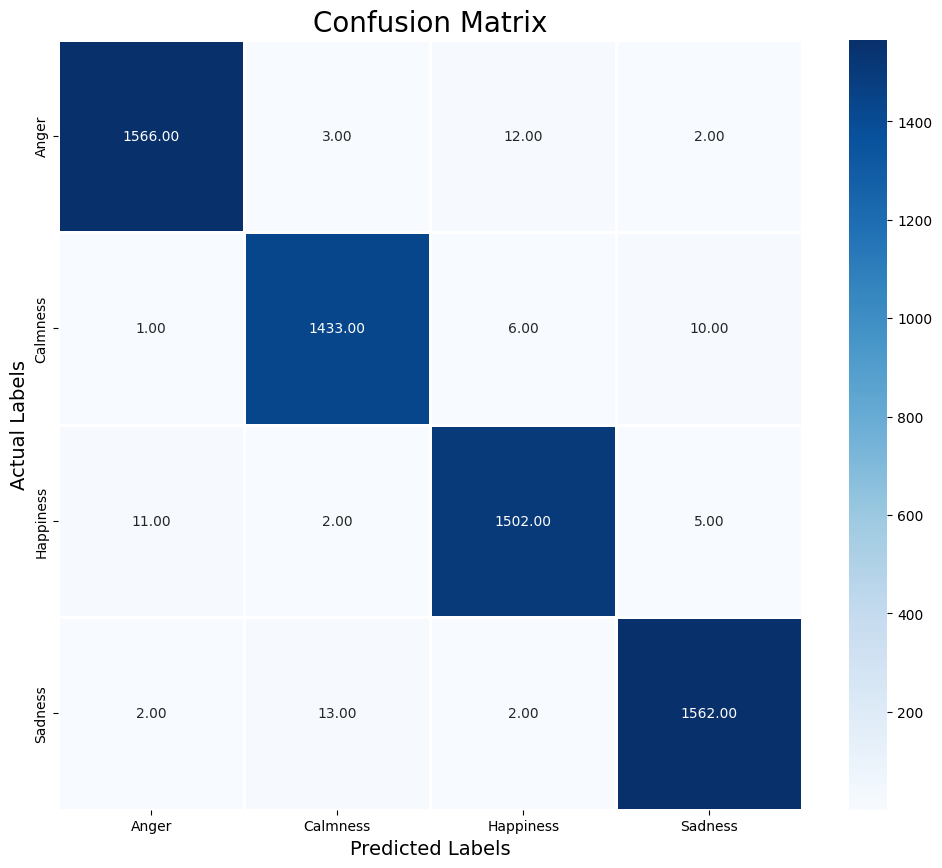

              precision    recall  f1-score   support

       Anger       0.99      0.99      0.99      1583
    Calmness       0.99      0.99      0.99      1450
   Happiness       0.99      0.99      0.99      1520
     Sadness       0.99      0.99      0.99      1579

    accuracy                           0.99      6132
   macro avg       0.99      0.99      0.99      6132
weighted avg       0.99      0.99      0.99      6132



In [25]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [26]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [28]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

192/192 [==============================] - 10s 48ms/step - loss: 0.0462 - accuracy: 0.9887
accuracy: 98.87%


Saving the Standard Scaler and encoder

In [29]:
import pickle

# Saving scaler
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done
